# Machine Learning For NLP Multi-Class Tweet Abussive dan Hate Speech in Twitter Indonesia Domain
## With Embbeding dan Tokenization
Name : Muhammad Anandha Fritama | Email : anandha.fritama@gmail.com

### Workflow Pembuatan Machine Learning
1. TensorFlow version check
2. Setup Datasets
3. Setup Directory
4. Pre-Processing (Tokenization & Sequencing)
5. Machine Learning Architecture
6. Compile & Training
7. Ploting

### TensorFlow version check

In [1]:
import tensorflow as tfl
print(tfl.__version__)

2.8.2


### Setup Datasets

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

  0% 0.00/814k [00:00<?, ?B/s]
100% 814k/814k [00:00<00:00, 102MB/s]


In [7]:
! unzip indonesian-abusive-and-hate-speech-twitter-text.zip

Archive:  indonesian-abusive-and-hate-speech-twitter-text.zip
  inflating: README.md               
  inflating: abusive.csv             
  inflating: citation.bib            
  inflating: data.csv                
  inflating: new_kamusalay.csv       


In [8]:
import pandas as pd
df = pd.read_csv('data.csv', encoding='latin-1')
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
tweet = df['Tweet'].values
label = df[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']].values

### Setup Direktori

In [10]:
from sklearn.model_selection import train_test_split
tweet_train, tweet_test, train_label, label_test = train_test_split(tweet, label, test_size=0.2)

### Pre-Processing (Tokenization & Sequenting)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=2500, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\nUSER', lower=False)
tokenizer.fit_on_texts(tweet_train) 
tokenizer.fit_on_texts(tweet_test)
 
train_sequence = tokenizer.texts_to_sequences(tweet_train)
test_sequence = tokenizer.texts_to_sequences(tweet_test)
 
padded_latih = pad_sequences(train_sequence) 
padded_test = pad_sequences(test_sequence)

### Membuat Arsitektur Machine Learning

In [12]:
model = tfl.keras.Sequential([
    tfl.keras.layers.Embedding(input_dim=2500, output_dim=64),
    tfl.keras.layers.LSTM(512),
    tfl.keras.layers.Dense(512, activation='sigmoid'),
    tfl.keras.layers.Dense(256, activation='sigmoid'),  
    tfl.keras.layers.Dense(128, activation='sigmoid'),  
    tfl.keras.layers.Dense(64, activation='sigmoid'),  
    tfl.keras.layers.Dense(32, activation='sigmoid'),
    tfl.keras.layers.Dense(16, activation='sigmoid'),
    tfl.keras.layers.Dropout(0.001),
    tfl.keras.layers.Dense(12, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          160000    
                                                                 
 lstm (LSTM)                 (None, 512)               1181696   
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2

### Compile & Training

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
adam = keras.optimizers.Adam(learning_rate=0.001, decay=0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [15]:
class Callbackku(tfl.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.88):
      print("\naccuracy value has >88%!")
      self.model.stop_training = True

In [19]:
hasil = model.fit(padded_latih, train_label, epochs=30, 
                    validation_data=(padded_test, label_test), verbose=1, callbacks=[Callbackku()], validation_split=0.2)

Epoch 1/30
264/264 [==============================] - 4s 13ms/step - loss: 4.6266 - accuracy: 0.1324 - val_loss: 4.5422 - val_accuracy: 0.1305
Epoch 2/30
264/264 [==============================] - 3s 13ms/step - loss: 4.5948 - accuracy: 0.1336 - val_loss: 4.6810 - val_accuracy: 0.1305
Epoch 3/30
264/264 [==============================] - 3s 13ms/step - loss: 4.6924 - accuracy: 0.1351 - val_loss: 4.6462 - val_accuracy: 0.1305
Epoch 4/30
264/264 [==============================] - 4s 14ms/step - loss: 4.6639 - accuracy: 0.1340 - val_loss: 4.6481 - val_accuracy: 0.1305
Epoch 5/30
264/264 [==============================] - 3s 13ms/step - loss: 4.6759 - accuracy: 0.1343 - val_loss: 4.6684 - val_accuracy: 0.1305
Epoch 6/30
264/264 [==============================] - 3s 13ms/step - loss: 4.6995 - accuracy: 0.1351 - val_loss: 4.6875 - val_accuracy: 0.1305
Epoch 7/30
264/264 [==============================] - 4s 14ms/step - loss: 4.7185 - accuracy: 0.1349 - val_loss: 4.7072 - val_accuracy: 0.1305

### Plotting

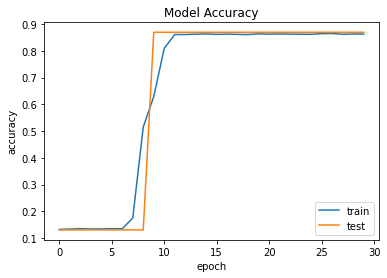

In [20]:
import matplotlib.pyplot as plt
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

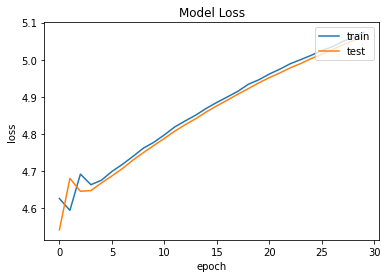

In [21]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()